[Reference](https://medium.com/omics-diary/how-to-evaluate-relatedness-between-categorical-variables-using-the-seaborn-library-93f2c00784da)

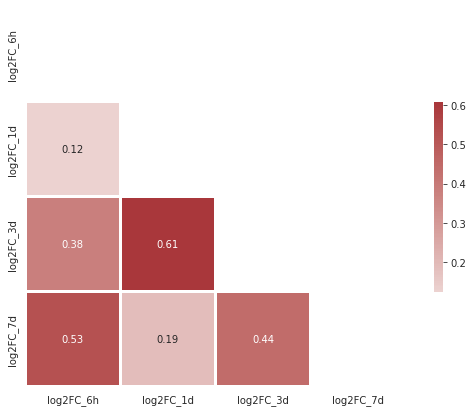

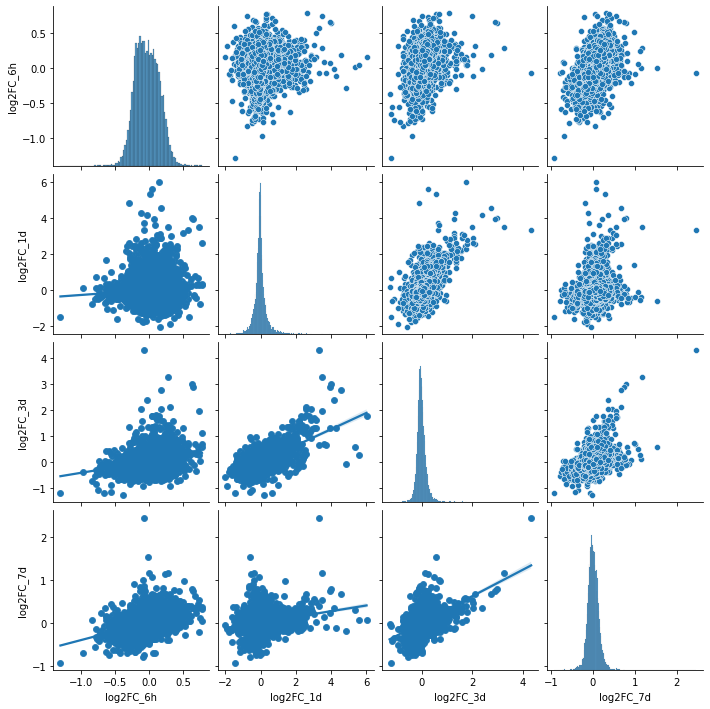

In [18]:
# Import packages
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataframe
df = pd.read_csv('https://raw.githubusercontent.com/kuanrongchan/vaccine-studies/main/Ad5_seroneg.csv',index_col=0)

# Caluculate log2FC and filter dataframe to contain log2FC values
df['log2FC_6h'] = np.log2(df['ratio_6h'])
df['log2FC_1d'] = np.log2(df['ratio_1d'])
df['log2FC_3d'] = np.log2(df['ratio_3d'])
df['log2FC_7d'] = np.log2(df['ratio_7d'])
df_log2FC = df.filter(items=['log2FC_6h','log2FC_1d', 'log2FC_3d', 'log2FC_7d'])
df_log2FC

# Correlation coefficient calculations
corr = df_log2FC.corr()

# Correlation p-value calculations
from scipy import stats 
from scipy.stats import pearsonr
pvals = pd.DataFrame([[pearsonr(df_log2FC[c], df_log2FC[y])[1] for y in df_log2FC.columns] for c in df_log2FC.columns],
                     columns=df_log2FC.columns, index=df_log2FC.columns)
pvals

# Correlation matrix plotting
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(corr, cmap="vlag", mask=mask, center=0, square=True, linewidths=2, annot=True, cbar_kws={"shrink": .5})

# Pairplot
df_log2FC = df_log2FC.reset_index()
df_log2FC = df_log2FC.drop_duplicates(subset=['gene'])
df_log2FC = df_log2FC.set_index('gene')
g = sns.pairplot(df_log2FC)
g.map_lower(sns.regplot)